In [66]:
import pandas as pd
from plotnine import (
    ggplot,
    aes,
    geom_histogram,
    theme_bw,
    labs,
    geom_point,
    scale_color_brewer,
    facet_wrap,
    geom_smooth,
    theme,
    scale_y_log10,
    facet_grid,
)
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

pd.set_option("display.float_format", lambda x: "%.2f" % x)

In [28]:
df = pd.read_csv("../data/full_data.csv", index_col="SEQN")

# raw data cleaning steps; handle missing
df["KIQ026"] = 0 or df["KIQ026"] == 1


def max_val_null(x, max_val):
    return np.where(x >= max_val, np.nan, x)


df["ALQ130"] = max_val_null(df["ALQ130"], 16)
df["PAD660"] = max_val_null(df["PAD660"], 7777)
df["PAD675"] = max_val_null(df["PAD675"], 7777)
df["PAD680"] = max_val_null(df["PAD680"], 7777)
df["PAQ605"] = df["PAQ605"] == 1
df["PAQ620"] = df["PAQ620"] == 1
df["OCQ180"] = max_val_null(df["OCQ180"], 7777)

In [29]:
column_map = {
    "INDFMMPI": "poverty_num",
    "INDFMMPC": "poverty_cat",
    "PAQ605": "activity_vig_work",
    "PAQ620": "activity_mod_work",
    "PAQ635": "activity_walk_or_use_bike",
    "PAD645": "activity_minutes_walk_bike",
    "PAD660": "activity_vig_min",
    "PAD675": "activity_mod_min",
    "PAD680": "activity_sed_min",
    "DSQTCAFF": "caffeine_sup_mg",
    "DR1ICAFF": "caffeine_intake1_mg",
    "DR2ICAFF": "caffeine_intake2_mg",
    "DR1TCAFF": "caffeine_nutrient1_mg",
    "DR2TCAFF": "caffeine_nutrient2_mg",
    "BMXBMI": "bmi_total",
    "BMXWAIST": "bmi_waist",
    "ALQ130": "alcohol_nmbr_drinks",
    "OCQ180": "occ_hours_worked",
    "OCQ670": "occ_work_shift",
    "DIQ010": "diabetes_diag",
    "DIQ050": "diabetes_insulin",
    "DIQ280": "diabetes_aic",
    "SMQ020": "smoking_100cigs",
    "SMD650": "smoking_cigs_pd",
    "KIQ026": "kidney_had_stones",
    "KIQ029": "kidney_passed_stone",
    "KIQ022": "kidney_weak_failing",
    "RIAGENDR": "demo_gender",
    "RIDRETH3": "demo_race",
    "RIDAGEYR": "demo_age",
}


# Data Cleaning Steps
df = df.rename(column_map, axis=1)
df.head()

,poverty_num,poverty_cat,activity_vig_work,activity_mod_work,activity_walk_or_use_bike,activity_minutes_walk_bike,activity_vig_min,activity_mod_min,activity_sed_min,caffeine_sup_mg,...,smoking_100cigs,smoking_cigs_pd,caffeine_nutrient1_mg,kidney_had_stones,kidney_passed_stone,kidney_weak_failing,demo_gender,demo_race,demo_age,caffeine_nutrient2_mg
SEQN,,,,,,,,,,,,,,,,,,,,,
109263,3.26,3.00,False,False,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.00,False,NaN,NaN,1.00,6.00,2.00,3.00
109264,1.29,1.00,False,False,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.00,False,NaN,NaN,2.00,1.00,13.00,0.00
109265,2.04,3.00,False,False,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,7.00,False,NaN,NaN,1.00,3.00,2.00,2.00
109266,5.00,3.00,False,False,2.00,NaN,60.00,30.00,480.00,NaN,...,2.00,NaN,12.00,False,NaN,2.00,2.00,6.00,29.00,38.00
109267,5.00,3.00,False,False,2.00,NaN,90.00,NaN,540.00,NaN,...,2.00,NaN,NaN,False,NaN,2.00,2.00,2.00,21.00,NaN


In [30]:
df[
    [
        "caffeine_sup_mg",
        "caffeine_intake1_mg",
        "caffeine_intake2_mg",
        "caffeine_nutrient1_mg",
        "caffeine_nutrient2_mg",
    ]
].round(2).describe()

,caffeine_sup_mg,caffeine_intake1_mg,caffeine_intake2_mg,caffeine_nutrient1_mg,caffeine_nutrient2_mg
count,32.00,0.00,0.00,12392.00,10627.00
mean,156.00,NaN,NaN,95.57,83.95
std,220.69,NaN,NaN,174.82,150.42
min,2.00,NaN,NaN,0.00,0.00
25%,52.25,NaN,NaN,0.00,0.00
50%,98.50,NaN,NaN,31.00,21.00
75%,169.75,NaN,NaN,137.00,120.00
max,1200.00,NaN,NaN,4320.00,5040.00


In [31]:
df["any_caffeine"] = df[
    [
        "caffeine_sup_mg",
        "caffeine_intake1_mg",
        "caffeine_intake2_mg",
        "caffeine_nutrient1_mg",
        "caffeine_nutrient2_mg",
    ]
].max(axis=1)
df["any_caffeine_log"] = np.log1p(df["any_caffeine"])
df["any_caffeine"].describe().apply("{0:.0f}".format)

count    12414
mean       115
std        191
min          0
25%          3
50%         50
75%        161
max       5040
Name: any_caffeine, dtype: object

In [32]:
(df.isna().sum() / df.shape[0]).sort_values(ascending=False)

caffeine_intake1_mg          1.00
caffeine_intake2_mg          1.00
caffeine_sup_mg              1.00
kidney_passed_stone          0.94
diabetes_aic                 0.92
diabetes_insulin             0.91
smoking_cigs_pd              0.89
activity_minutes_walk_bike   0.86
activity_vig_min             0.84
activity_mod_min             0.75
occ_hours_worked             0.66
occ_work_shift               0.64
alcohol_nmbr_drinks          0.62
kidney_weak_failing          0.41
activity_sed_min             0.38
activity_walk_or_use_bike    0.38
smoking_100cigs              0.38
caffeine_nutrient2_mg        0.32
poverty_num                  0.21
caffeine_nutrient1_mg        0.20
any_caffeine                 0.20
any_caffeine_log             0.20
bmi_waist                    0.19
bmi_total                    0.16
poverty_cat                  0.08
diabetes_diag                0.04
kidney_had_stones            0.00
activity_mod_work            0.00
demo_gender                  0.00
demo_race     

/Users/mcanearm/miniconda3/envs/ygtbkm/lib/python3.12/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_bin : Removed 3146 rows containing non-finite values.
/Users/mcanearm/miniconda3/envs/ygtbkm/lib/python3.12/site-packages/plotnine/stats/binning.py:172: FutureWarning: The provided callable <function sum at 0x12020c4a0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.


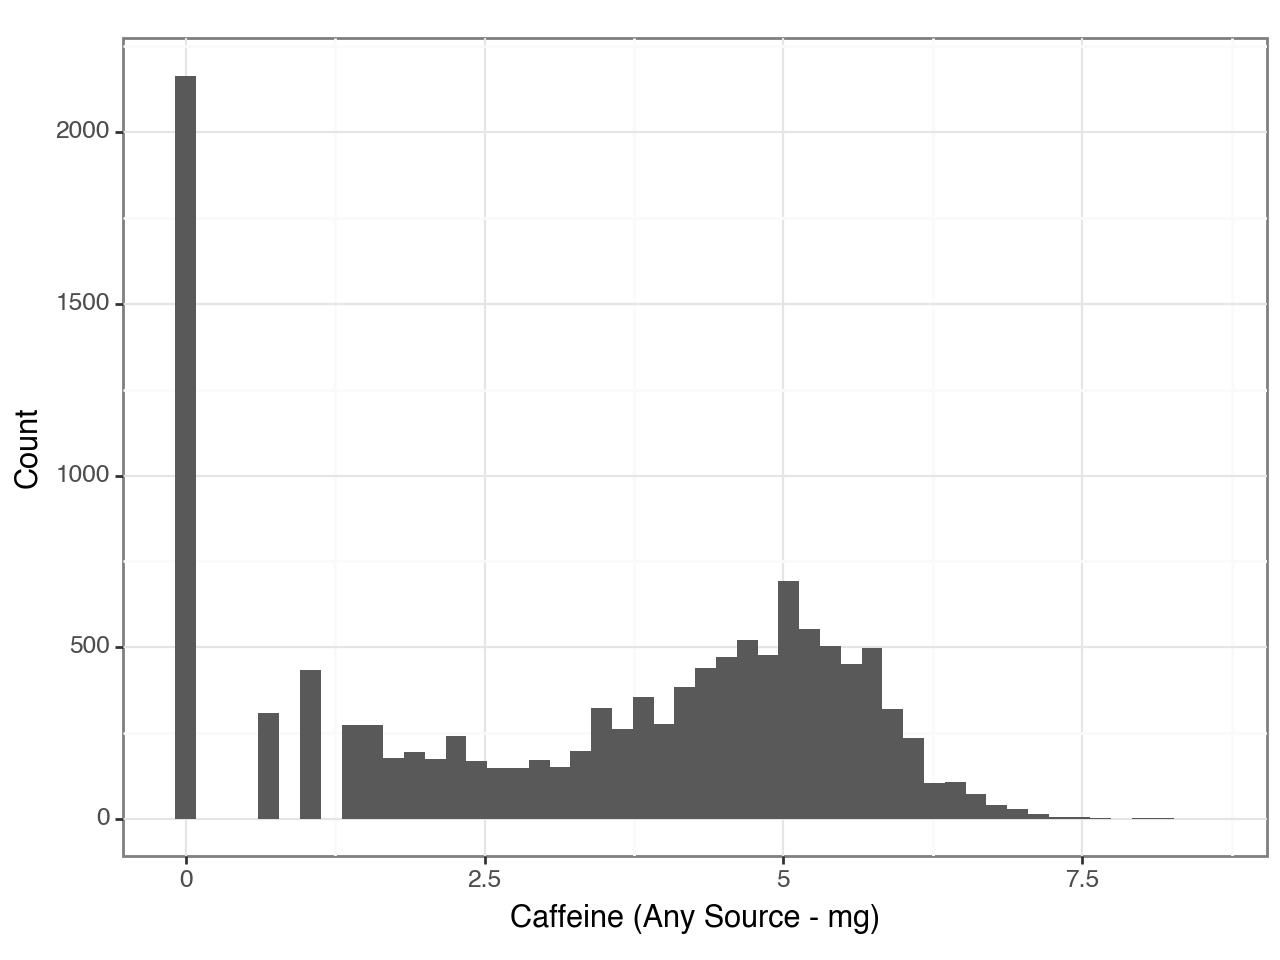

<Figure Size: (640 x 480)>

In [33]:
(
    ggplot(data=df, mapping=aes(x="any_caffeine_log"))
    + geom_histogram(bins=50)
    + theme_bw()
    + labs(y="Count", x="Caffeine (Any Source - mg)")
)

/var/folders/qk/w86hxqjx1sz7tb4pk4_gy8pm0000gn/T/ipykernel_95236/51969089.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
/Users/mcanearm/miniconda3/envs/ygtbkm/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 1324 rows containing missing values.


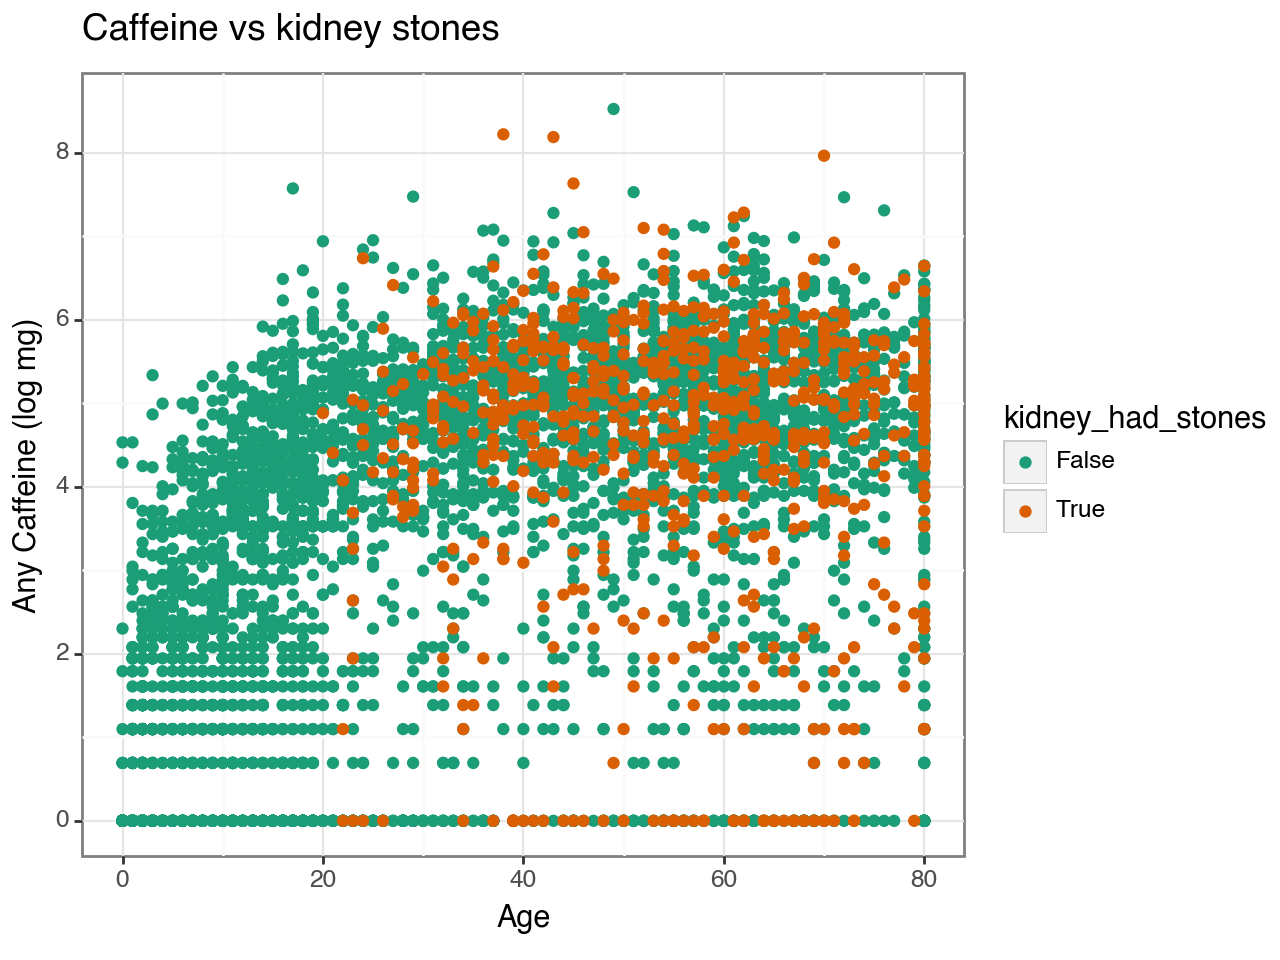

<Figure Size: (640 x 480)>

In [34]:
kidney_undersample = (
    df.groupby("kidney_had_stones")
    .apply(lambda x: x.sample(n=min(5500, len(x))))
    .droplevel(0)
)
(
    ggplot(
        data=kidney_undersample,
        mapping=aes(x="demo_age", y="any_caffeine_log", color="kidney_had_stones"),
    )
    + geom_point()
    + theme_bw()
    + labs(y="Any Caffeine (log mg)", x="Age", title="Caffeine vs kidney stones")
    + scale_color_brewer(palette="Dark2", type="qual")
)

/Users/mcanearm/miniconda3/envs/ygtbkm/lib/python3.12/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_bin : Removed 59474 rows containing non-finite values.
/Users/mcanearm/miniconda3/envs/ygtbkm/lib/python3.12/site-packages/plotnine/utils.py:596: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/Users/mcanearm/miniconda3/envs/ygtbkm/lib/python3.12/site-packages/plotnine/stats/binning.py:172: FutureWarning: The provided callable <function sum at 0x12020c4a0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
/Users/mcanearm/miniconda3/envs/ygtbkm/lib/python3.12/site-packages/plotnine/stats/binning.py:172: FutureWarning: The provided callable <function sum at 0x12020c4a0> 

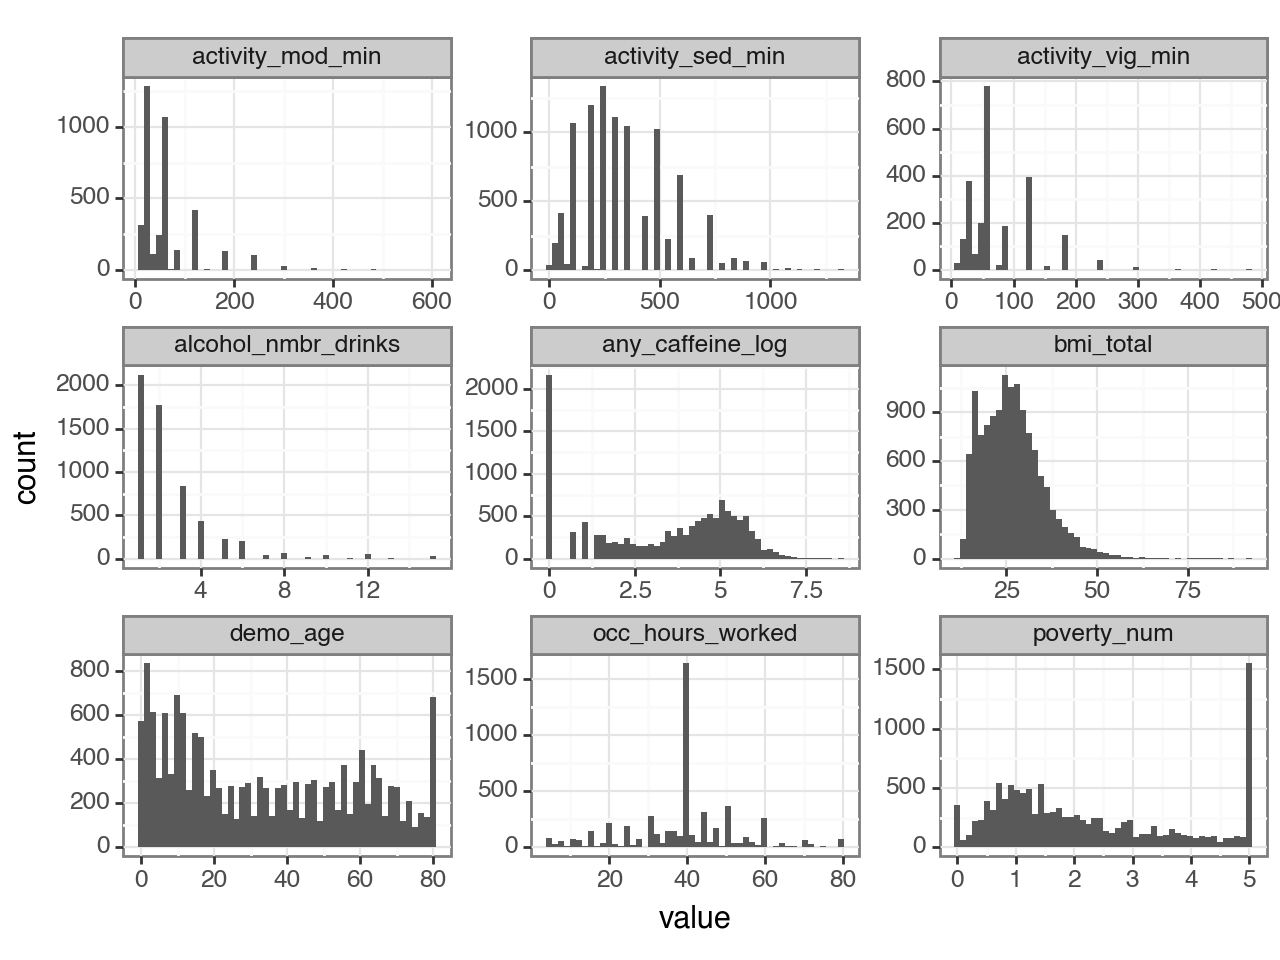

<Figure Size: (640 x 480)>

In [88]:
hist_vars = [
    "poverty_num",
    "activity_vig_min",
    "activity_mod_min",
    "activity_sed_min",
    "any_caffeine_log",
    "demo_age",
    "bmi_total",
    "occ_hours_worked",
    "alcohol_nmbr_drinks",
]
(
    ggplot(data=df[hist_vars].melt(), mapping=aes(x="value"))
    + facet_wrap("~variable", scales="free")
    + geom_histogram(bins=50)
    + theme_bw()
)

/Users/mcanearm/miniconda3/envs/ygtbkm/lib/python3.12/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_bin : Removed 59474 rows containing non-finite values.
/Users/mcanearm/miniconda3/envs/ygtbkm/lib/python3.12/site-packages/plotnine/utils.py:596: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/Users/mcanearm/miniconda3/envs/ygtbkm/lib/python3.12/site-packages/plotnine/stats/binning.py:172: FutureWarning: The provided callable <function sum at 0x12020c4a0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
/Users/mcanearm/miniconda3/envs/ygtbkm/lib/python3.12/site-packages/plotnine/stats/binning.py:172: FutureWarning: The provided callable <function sum at 0x12020c4a0> 

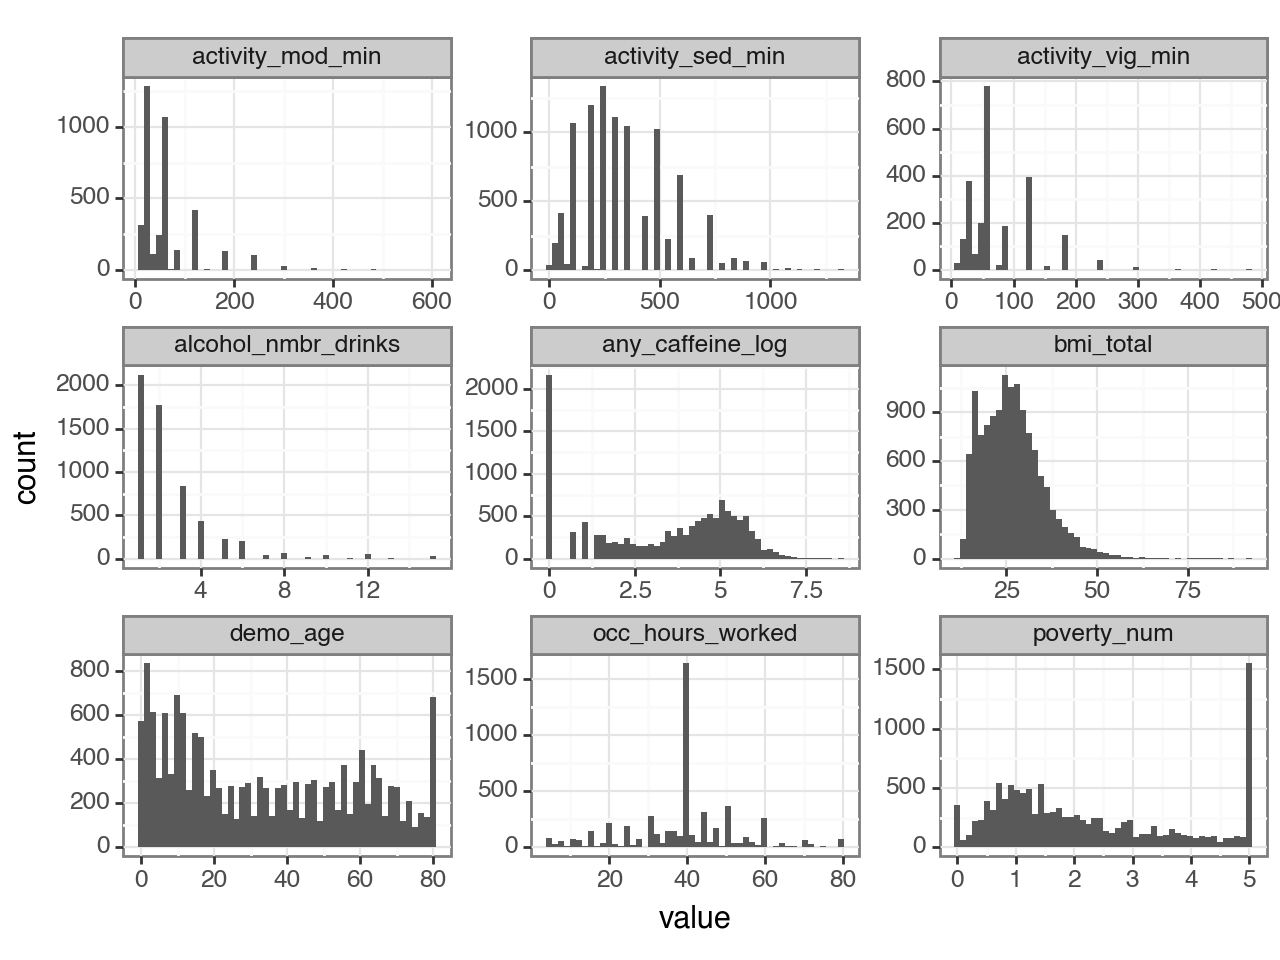

<Figure Size: (640 x 480)>

In [89]:
hist_vars = [
    "poverty_num",
    "activity_vig_min",
    "activity_mod_min",
    "activity_sed_min",
    "any_caffeine_log",
    "demo_age",
    "bmi_total",
    "occ_hours_worked",
    "alcohol_nmbr_drinks",
]
(
    ggplot(data=df[hist_vars].melt(), mapping=aes(x="value"))
    + facet_wrap("~variable", scales="free")
    + geom_histogram(bins=50)
    + theme_bw()
)

In [90]:
all_vars = hist_vars + ["any_caffeine_log", "demo_race", "demo_gender"]
df[all_vars].isna().sum() / df.shape[0]

poverty_num           0.21
activity_vig_min      0.84
activity_mod_min      0.75
activity_sed_min      0.38
any_caffeine_log      0.20
demo_age              0.00
bmi_total             0.16
occ_hours_worked      0.66
alcohol_nmbr_drinks   0.62
any_caffeine_log      0.20
demo_race             0.00
demo_gender           0.00
dtype: float64

In [91]:
df[["activity_vig_any", "activity_mod_any", "activity_sed_any"]] = (
    df[["activity_vig_min", "activity_mod_min", "activity_sed_min"]].fillna(0) > 0
)

/Users/mcanearm/miniconda3/envs/ygtbkm/lib/python3.12/site-packages/plotnine/utils.py:596: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/Users/mcanearm/miniconda3/envs/ygtbkm/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 64825 rows containing missing values.
/Users/mcanearm/miniconda3/envs/ygtbkm/lib/python3.12/site-packages/plotnine/geoms/geom.py:289: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/Users/mcanearm/miniconda3/envs/ygtbkm/lib/python3.12/site-packages/plotnine/geoms/geom.py:289: FutureWarning: The default of observed=False is deprecated and will be changed

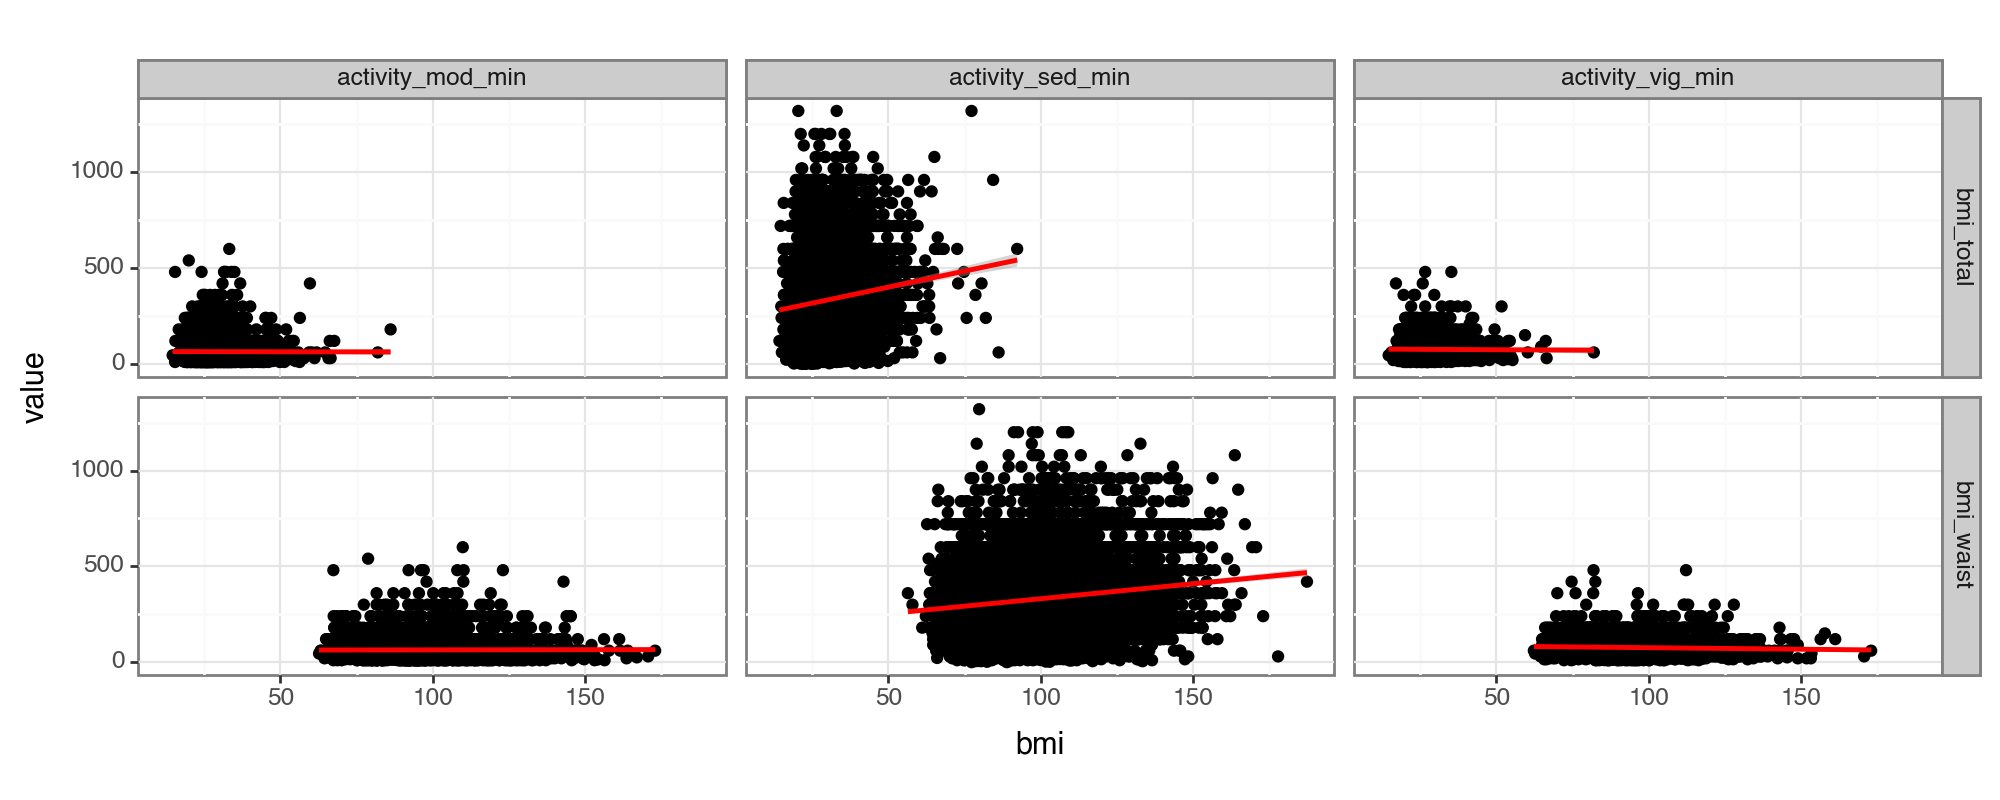

<Figure Size: (1000 x 400)>

In [92]:
bmi_plot_df = (
    df[
        [
            "bmi_total",
            "bmi_waist",
            "activity_vig_min",
            "activity_mod_min",
            "activity_sed_min",
        ]
    ]
    .melt(id_vars=["bmi_waist", "bmi_total"])
    .melt(id_vars=["variable", "value"], value_name="bmi", var_name="measure")
)
(
    ggplot(
        data=bmi_plot_df,
        mapping=aes(x="bmi", y="value"),
    )
    + geom_point()
    + geom_smooth(color="red")
    + facet_grid("measure~variable", scales="free_y")
    + theme_bw()
    + theme(figure_size=(10, 4))
)